In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split

# visualisations
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style("whitegrid")
sns.set(rc = {'figure.figsize':(15, 10)})

In [5]:
# reading dataset.

maindf = pd.read_csv('C:\\Users\\NEW LIFE\\Downloads\\vgsales.csv\\vgsales.csv',index_col=0)

In [7]:
# first create a copy of main data set for practice.
df = maindf.copy()
df.head(10)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
Rank,,,,,,,,,,
1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62


In [8]:
# declaring independent variable X & dependent vriable y

independent = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
X = df[independent]  
y = df['Global_Sales']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 42)

Text(0.5, 1.0, 'Correlation matrix')

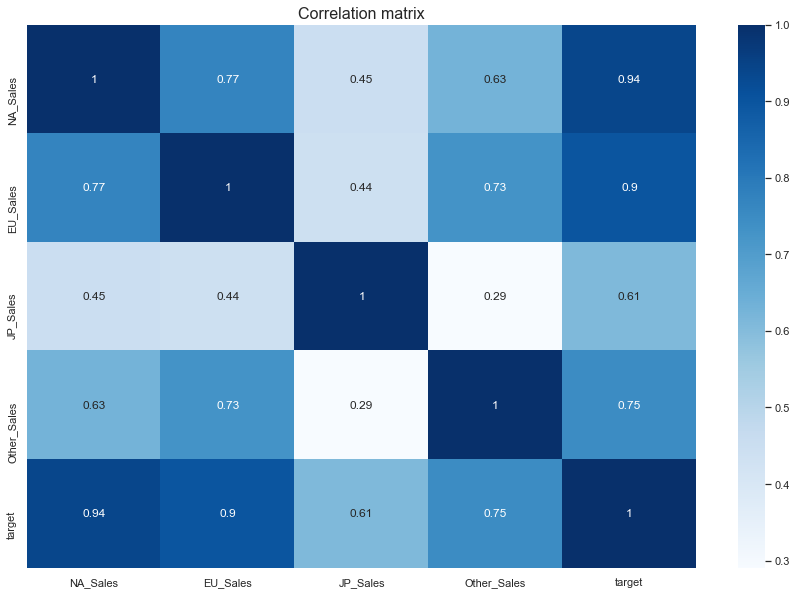

In [11]:
sns.heatmap(X.assign(target = y).corr().round(2), 
            cmap = 'Blues', annot = True).set_title('Correlation matrix', fontsize = 16)

In [12]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators = 100,
                           n_jobs = -1,
                           bootstrap = True,
                           random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [13]:
print('R^2 Training Score: {:.2f}'.format(rf.score(X_train, y_train)))
print('R^2 Test Score: {:.2f}'.format(rf.score(X_test, y_test)))

R^2 Training Score: 0.99
R^2 Test Score: 0.89


In [14]:
rf.feature_importances_

array([0.80662825, 0.12530092, 0.05084698, 0.01722385])

In [16]:
feature_imp = pd.DataFrame({'feature': X_train.columns,'feature_importance': rf.feature_importances_}) \
               .sort_values('feature_importance', ascending = False) \
               .reset_index(drop = True)

In [17]:
feature_imp

,feature,feature_importance
0,NA_Sales,0.806628
1,EU_Sales,0.125301
2,JP_Sales,0.050847
3,Other_Sales,0.017224


In [18]:
feature_imp.feature

0       NA_Sales
1       EU_Sales
2       JP_Sales
3    Other_Sales
Name: feature, dtype: object

Text(0.5, 1.0, 'Default feature importance (scikit-learn)')

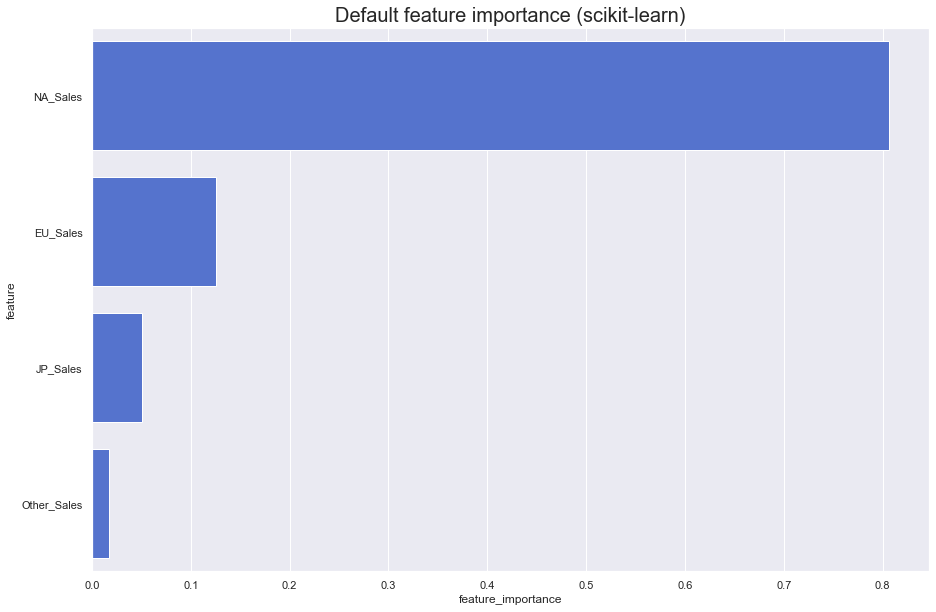

In [19]:
# plotting a feature importance dataframe (horizontal barchart)

sns.barplot(x = 'feature_importance', y = 'feature', data = feature_imp, orient = 'h', color = 'royalblue') \
       .set_title('Default feature importance (scikit-learn)', fontsize = 20)